## Iteration 1

In [ ]:
train_dir = "Data Set Ordered/training data/"
val_dir = "Data Set Ordered/validation data/"
test_dir = "Data Set Ordered/test data/"

In [ ]:
from keras.applications import MobileNetV3Small
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import SGD
from keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
)


# Train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    val_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
)

# Validation generator
test_generator = train_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='categorical',
)

base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
      layer.trainable = False

  # Add custom layers for classification
x = base_model.output
x = Flatten()(x)
preds = Dense(7,activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=preds)

sgd = SGD()

# Compile model - make it trainable
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])



Found 10015 images belonging to 7 classes.
Found 193 images belonging to 7 classes.
Found 1512 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

# Define the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='models/best_model_iteration_1.h5',
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',  
    patience=15,          
    min_delta=0.001      
)

# Train the model with the callback
history2 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=1,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 8.4423 - accuracy: 0.6684
Epoch 1: val_loss improved from inf to 5.94430, saving model to models/best_model_iteration_1.h5
313/313 [==============================] - 31s 92ms/step - loss: 8.4423 - accuracy: 0.6684 - val_loss: 5.9443 - val_accuracy: 0.7409
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 4.5675 - accuracy: 0.7583
Epoch 2: val_loss did not improve from 5.94430
313/313 [==============================] - 33s 105ms/step - loss: 4.5675 - accuracy: 0.7583 - val_loss: 8.3247 - val_accuracy: 0.5596
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.1558 - accuracy: 0.8072
Epoch 3: val_loss improved from 5.94430 to 2.62422, saving model to models/best_model_iteration_1.h5
313/313 [==============================] - 32s 102ms/step - loss: 3.1558 - accuracy: 0.8072 - val_loss: 2.6242 - val_accuracy: 0.7824
Epoch 4/50
313/313 [==============================] - ETA: 0s - lo

Balanced Accrucay: 0.4544381064284993
Accuracy on test set: 0.7023809552192688
F1 Score: 0.6968233065172709


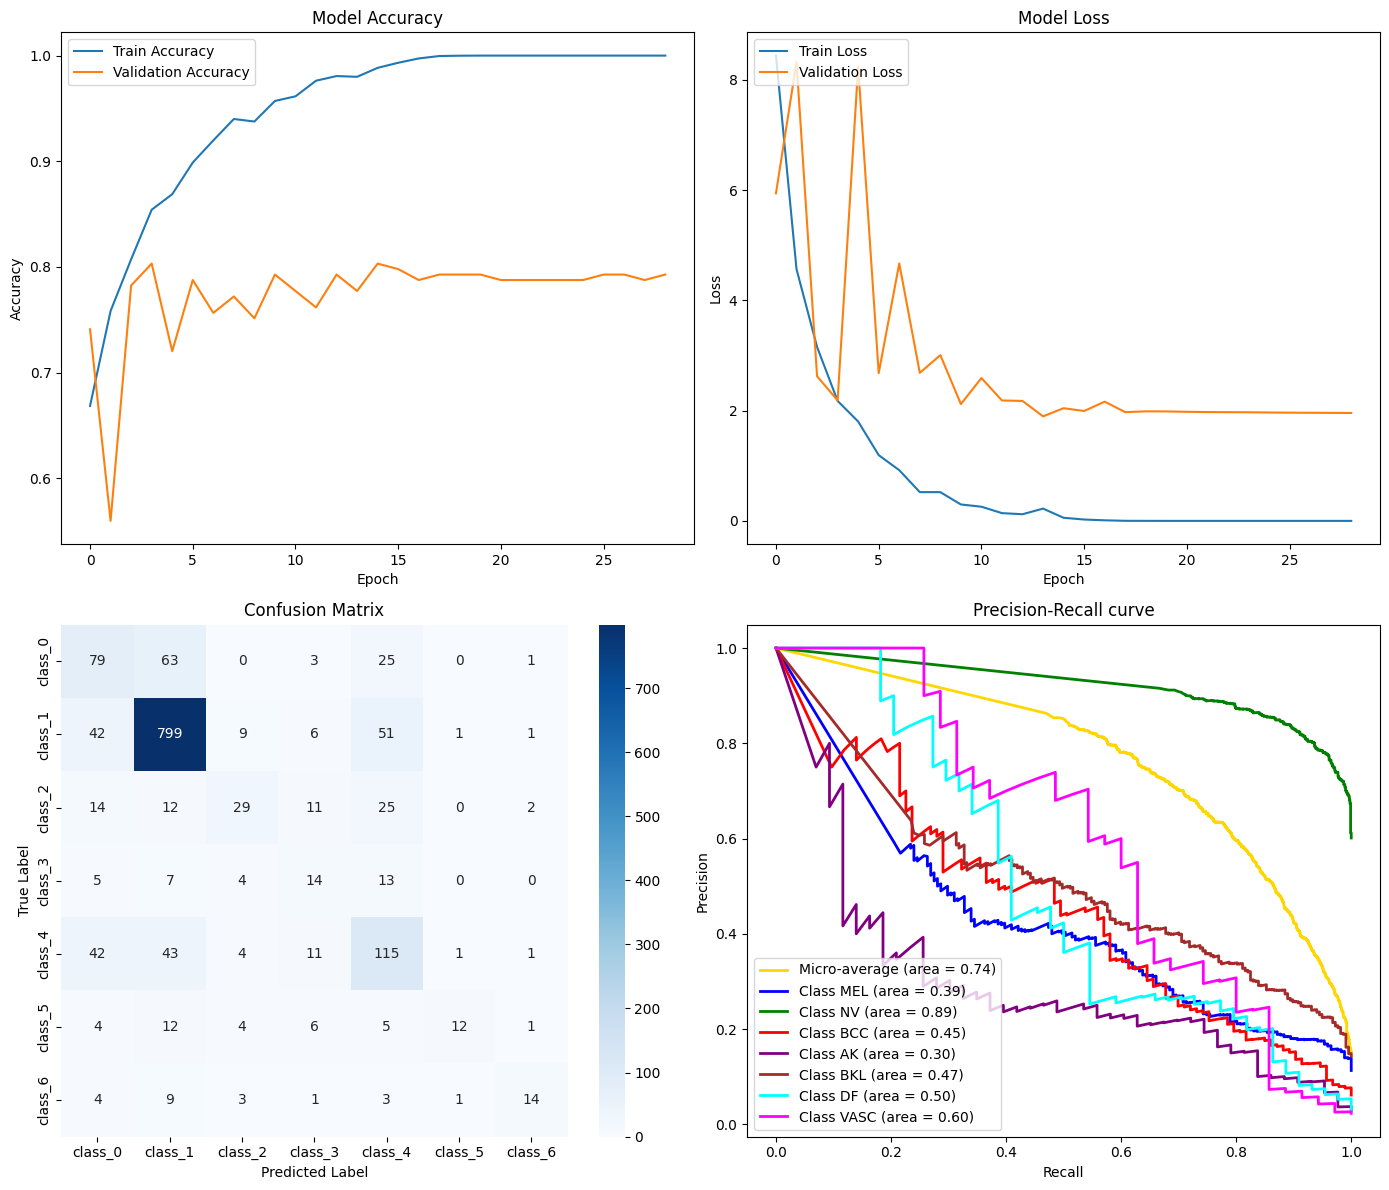

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('models/best_model_iteration_1.h5')

show_all_plots(history2, model, test_generator)

### What did we learn????

- Overfitting:
    - yes, we think
- Efficiency:
    - Super fint - den er hurtig (30 sec per epoch - 100=51 min)
- Performance:
    - Accuracy -> train=100, val=77.72, test: 70.42
    - loss -> train=fuckinglav, val=1.84854, test=4.7873

Takaways:
- We do not overfit, so we can try with a more complex model?
- We did not expect it to learn to differentiate between the 7 classes as they are very unbalanced.
- We did not expect it to learn this much
- It doesnt learn that well for val/test and there is a large gap between train and the others

What to do next time?
- Experiment with Learning Rate
    - we can observe that model has "plateaued", meaning that the validation loss neither goes up or down, 
    with the use of a Learning Rate Scheduler we could force the model out of the plateau and maybe achieve a lower loss (maybe?).
    - week 6 slide11
- Experiment with Regularization 
    - we can observe that there is a significant difference between the loss in train and val. This can be tackle by implementing regularization techniques.
        - Data augmentation
        - Early Stopping! (always do this)
        - Dropout
        - Add Noise when training